# K Nearest Neighbors Project 

## Import Libraries
- Import pandas,seaborn, and the usual libraries.

In [75]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
- Read the 'KNN_Project_Data csv file into a dataframe

In [76]:
df = pd.read_csv('KNN_Project_Data.csv')

- Check the head of the dataframe.

In [77]:
df.head()
df.shape
df.head()

Unnamed: 0         XVPM         GWYH         TRAT        TLLZ         IGGA  \
0           0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1           1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2           2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3           3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4           4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

- Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.
- optional corner=False or corner=True for cleanliness

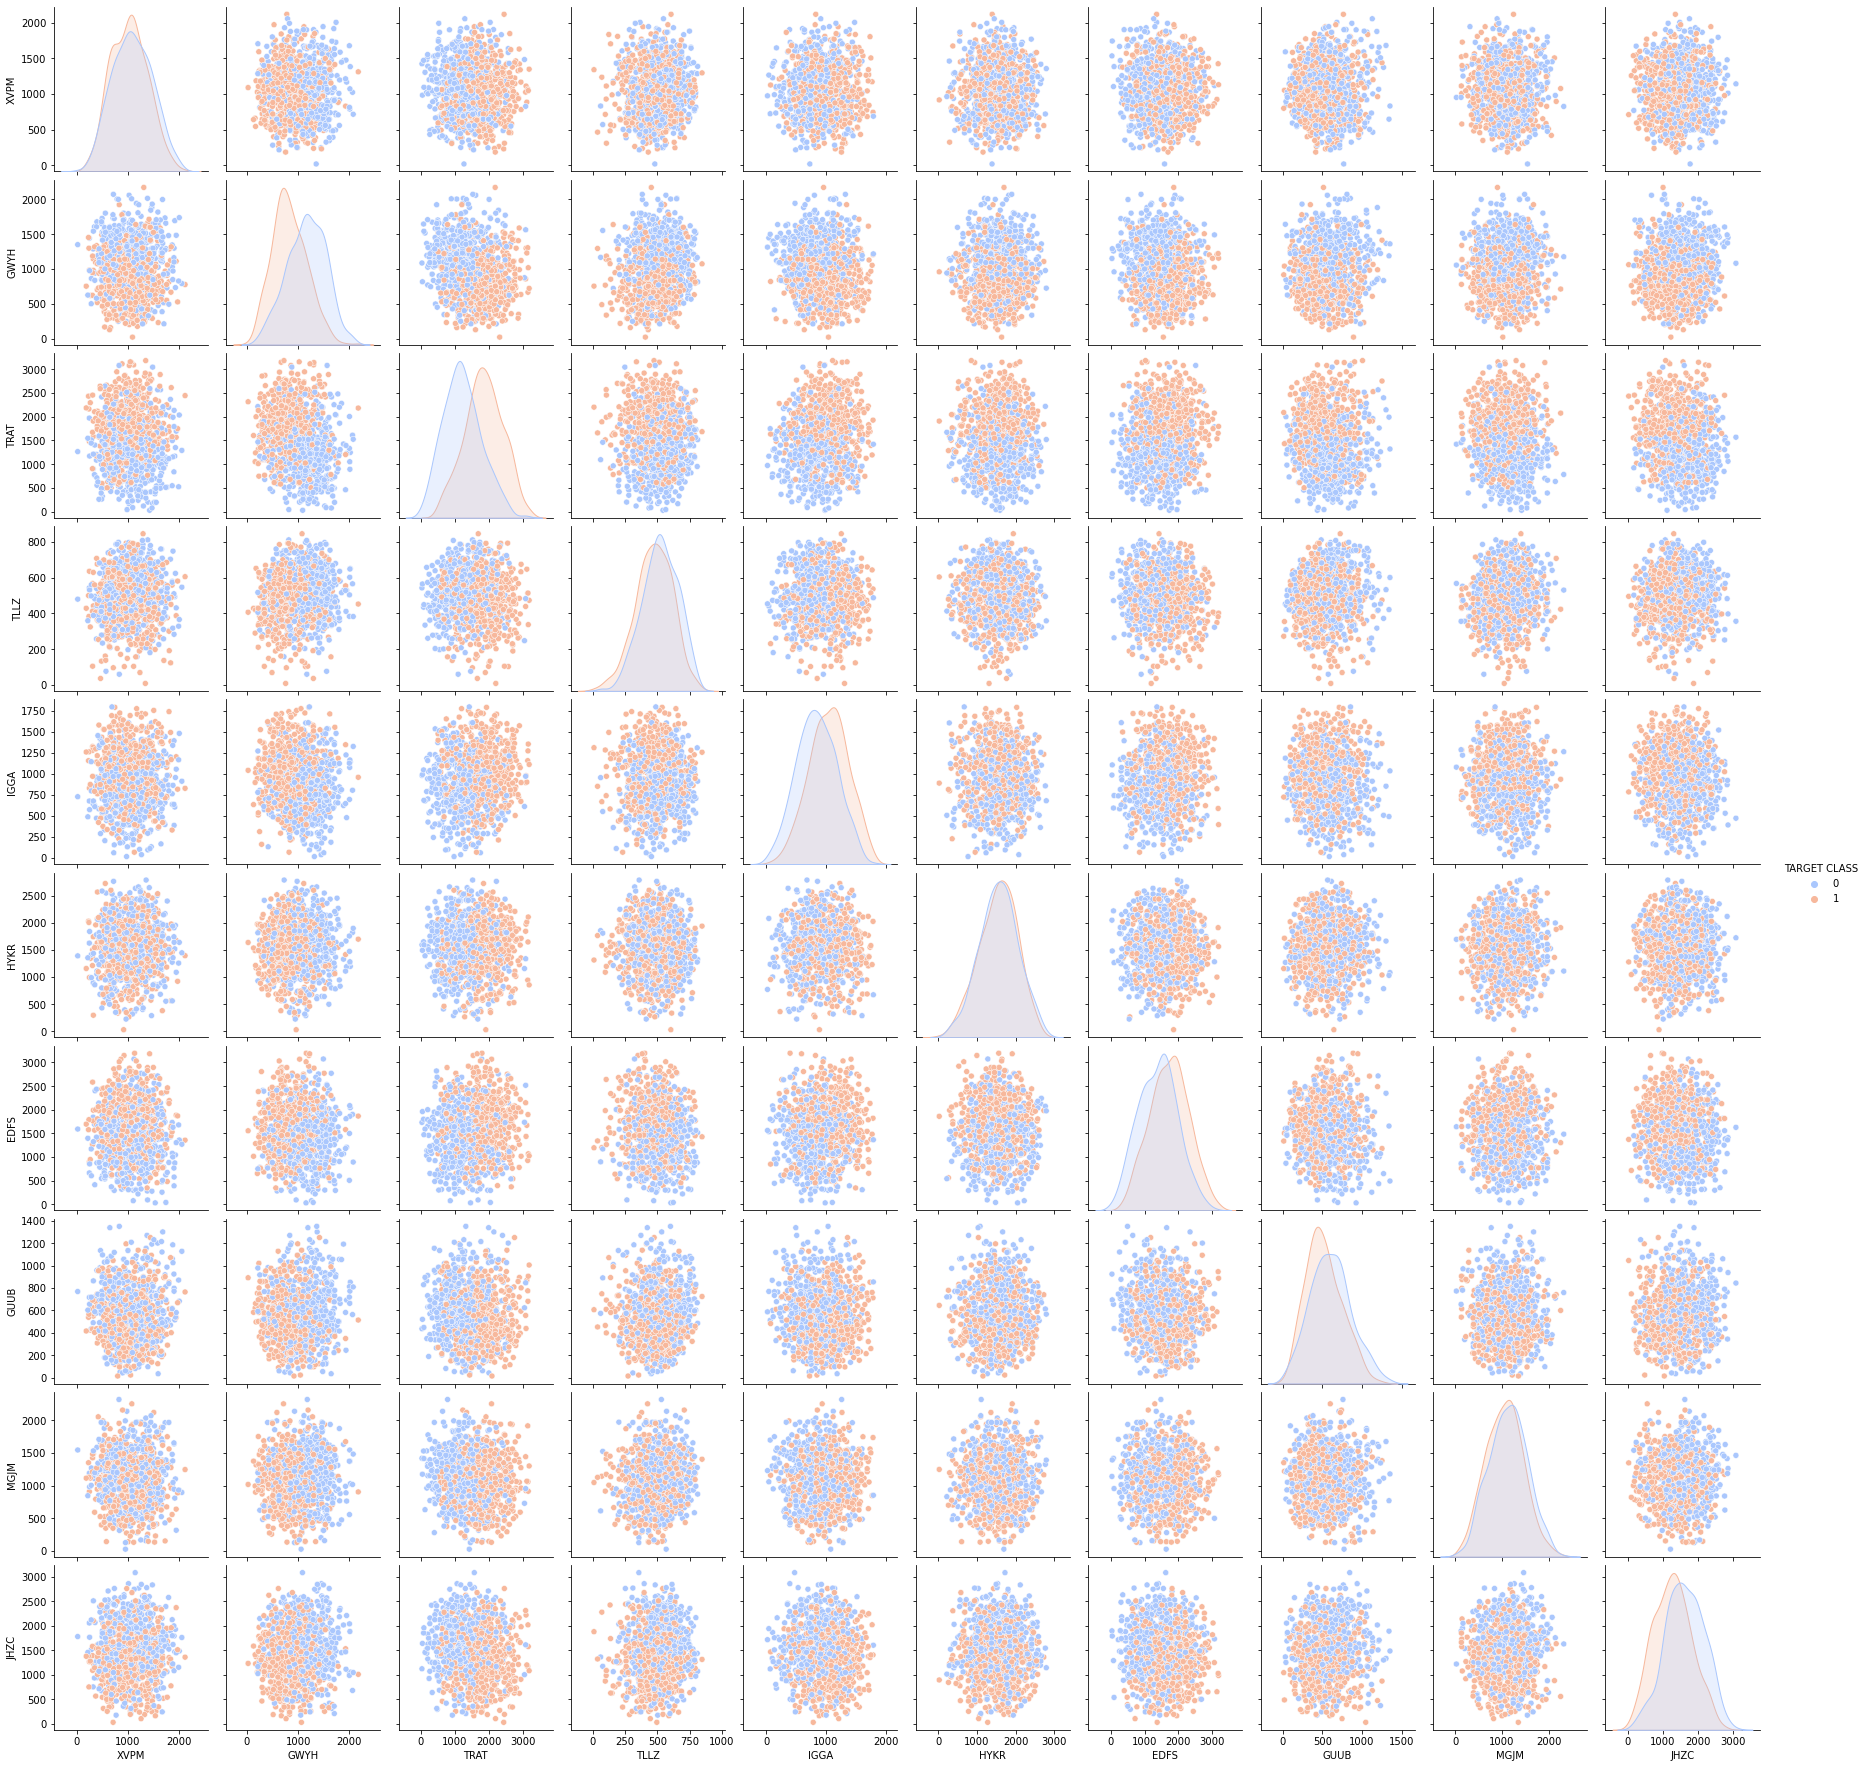

In [78]:
sns.pairplot(df.iloc[:,1:12], corner = False, palette = 'coolwarm', hue = 'TARGET CLASS')

# Train Test Split

- Use train_test_split to split your data into a training set and a testing set.

In [79]:
X = df.iloc[:,1:12] #picking all the columns 
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state = 42,test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 11) (200, 11) (800,) (200,)


- Produce a Histogram of Training features

(array([[ 12.,  98., 211., 244., 168.,  60.,   7.,   0.,   0.,   0.],
        [ 30., 140., 223., 212., 144.,  43.,   8.,   0.,   0.,   0.],
        [ 15.,  48.,  92., 144., 137., 142., 103.,  67.,  41.,  11.],
        [ 87., 576., 137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 29., 136., 266., 234., 115.,  20.,   0.,   0.,   0.,   0.],
        [  4.,  27.,  65., 133., 191., 196., 119.,  55.,  10.,   0.],
        [  9.,  38.,  95., 114., 155., 159., 124.,  67.,  30.,   9.],
        [134., 399., 217.,  49.,   1.,   0.,   0.,   0.,   0.,   0.],
        [ 16.,  90., 183., 251., 175.,  66.,  18.,   1.,   0.,   0.],
        [ 16.,  51.,  91., 157., 167., 138., 102.,  63.,  14.,   1.],
        [800.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([   0. ,  319.6,  639.2,  958.8, 1278.4, 1598. , 1917.6, 2237.2,
        2556.8, 2876.4, 3196. ]),
 <a list of 11 BarContainer objects>)

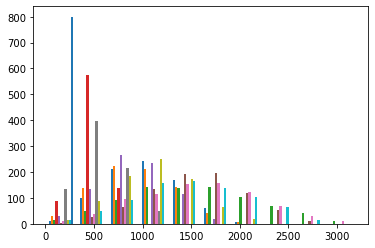

In [32]:
plt.hist(X_train)

# Standardize the Variables

Time to standardize the variables.
- Import StandardScaler from Scikit learn.

In [80]:
from sklearn.preprocessing import StandardScaler

- Create a StandardScaler() object called scaler.

In [81]:
sc_x = StandardScaler()

- Use the .fit_transform() method to transform the X_train, X_test

In [82]:
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

X_train, X_test

(array([[ 1.24420596,  0.12365499, -1.81034361, ..., -0.79081682,
         -0.5849472 , -1.        ],
        [ 1.46108652, -0.6800883 ,  0.51934786, ...,  0.71361945,
         -1.63313489, -1.        ],
        [ 1.24956253,  1.73728314, -0.41465578, ..., -1.76665104,
         -0.16191105, -1.        ],
        ...,
        [ 1.56401636, -1.0614503 ,  0.85130431, ...,  0.66521304,
         -0.45065393,  1.        ],
        [ 1.18382721, -0.03580113, -0.21109051, ...,  1.01267261,
         -0.07491127,  1.        ],
        [ 0.72903512, -1.60631123,  1.2667385 , ...,  0.11486512,
         -0.79816418,  1.        ]]),
 array([[ 1.40602945, -0.67084043, -2.02864028, ...,  0.67963719,
          0.66754976, -1.        ],
        [ 0.46270401,  2.00549534,  0.52100999, ..., -0.64258773,
          1.54749407, -1.        ],
        [ 0.09647059, -1.07523006, -0.05350863, ..., -0.67237854,
          0.55629076,  1.        ],
        ...,
        [-0.16973258, -0.26539779, -1.35885198, ...,  

- Produce a Histogram of the scaled features to check the new Range and distribution.

(array([[  0.,   7.,  54., 139., 173., 190., 143.,  73.,  19.,   2.],
        [  0.,   2.,  54., 142., 187., 183., 130.,  83.,  13.,   6.],
        [  0.,   7.,  51., 131., 190., 188., 134.,  79.,  20.,   0.],
        [  7.,   8.,  58., 103., 180., 206., 153.,  72.,  13.,   0.],
        [  0.,  14.,  44., 120., 197., 188., 148.,  69.,  20.,   0.],
        [  1.,  16.,  50., 108., 178., 217., 143.,  67.,  20.,   0.],
        [  0.,   9.,  56., 126., 166., 211., 138.,  70.,  21.,   3.],
        [  0.,   1.,  48., 143., 203., 171., 139.,  62.,  25.,   8.],
        [  0.,  10.,  59., 113., 185., 208., 139.,  60.,  24.,   2.],
        [  0.,   8.,  54., 118., 201., 190., 128.,  86.,  14.,   1.],
        [  0.,   0.,   0., 400.,   0.,   0., 400.,   0.,   0.,   0.]]),
 array([-3.45584783, -2.78440776, -2.11296769, -1.44152762, -0.77008755,
        -0.09864748,  0.57279259,  1.24423266,  1.91567273,  2.5871128 ,
         3.25855287]),
 <a list of 11 BarContainer objects>)

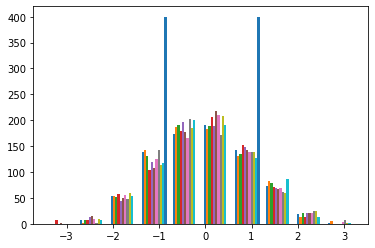

In [43]:
## ranges are between -1 and 1. Normal distribution fro the scaled features
plt.hist(X_train)

(array([[  2.,   6.,  35.,  33.,  39.,  42.,  26.,   8.,   8.,   1.],
        [  3.,   8.,  26.,  46.,  34.,  36.,  29.,  13.,   3.,   2.],
        [  0.,  15.,  29.,  26.,  44.,  39.,  26.,  16.,   4.,   1.],
        [  6.,   9.,  19.,  38.,  44.,  34.,  30.,  14.,   6.,   0.],
        [  4.,  14.,  22.,  30.,  38.,  42.,  32.,  16.,   2.,   0.],
        [  5.,   9.,  25.,  29.,  42.,  44.,  28.,  15.,   3.,   0.],
        [  2.,  13.,  23.,  35.,  45.,  37.,  28.,   9.,   7.,   1.],
        [  3.,  13.,  17.,  44.,  38.,  44.,  17.,  16.,   6.,   2.],
        [  3.,   9.,  29.,  35.,  36.,  44.,  25.,  12.,   5.,   2.],
        [  2.,  15.,  19.,  40.,  46.,  32.,  24.,  16.,   5.,   1.],
        [  0.,   0., 100.,   0.,   0.,   0., 100.,   0.,   0.,   0.]]),
 array([-2.60154317, -2.03901739, -1.47649161, -0.91396583, -0.35144005,
         0.21108573,  0.7736115 ,  1.33613728,  1.89866306,  2.46118884,
         3.02371462]),
 <a list of 11 BarContainer objects>)

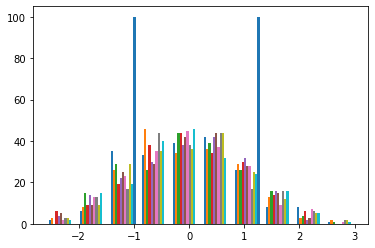

In [44]:
plt.hist(X_test)

# Using KNN

- Import KNeighborsClassifier from scikit learn. (if applicable)

In [46]:
# Imported in the first cell
# Create KNN Object
classifier = KNeighborsClassifier(n_neighbors=11, metric='euclidean')

- Create a KNN model instance with n_neighbors=(sqrt(len(y_test)))

In [57]:
classifier = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(y_test))), metric='euclidean')

In [58]:
int(np.sqrt(len(y_test))) ## k =14

14

- Fit this KNN model to the training data.

In [59]:
classifier.fit(X_train, y_train)
classifier

KNeighborsClassifier(metric='euclidean', n_neighbors=14)

# Predictions and Evaluations
Let's evaluate our KNN model!

- Use the predict method to predict values using your KNN model and X_test.

In [60]:
y_pred = classifier.predict(X_test)
y_test, y_pred

(521    0
 737    0
 740    1
 660    0
 411    0
       ..
 408    0
 332    0
 208    0
 613    0
 78     1
 Name: TARGET CLASS, Length: 200, dtype: int64,
 array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 1], dtype=int64))

- Create a confusion matrix and classification report.

In [61]:
confusion_matrix(y_test, y_pred)

array([[ 99,   1],
       [  0, 100]], dtype=int64)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.99      1.00      1.00       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

- Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.

In [67]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

- Now create the following plot using the information from your for loop.

Text(0, 0.5, 'Error Rate')

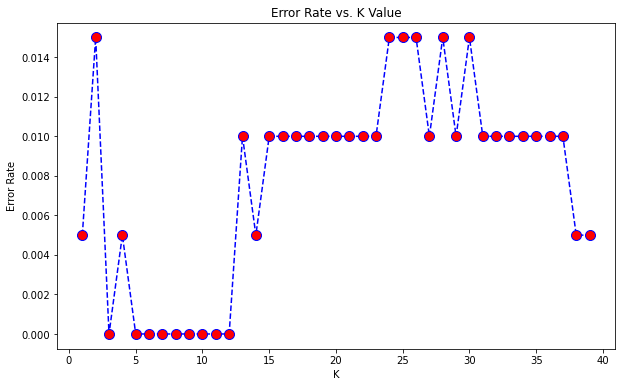

In [66]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue',linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

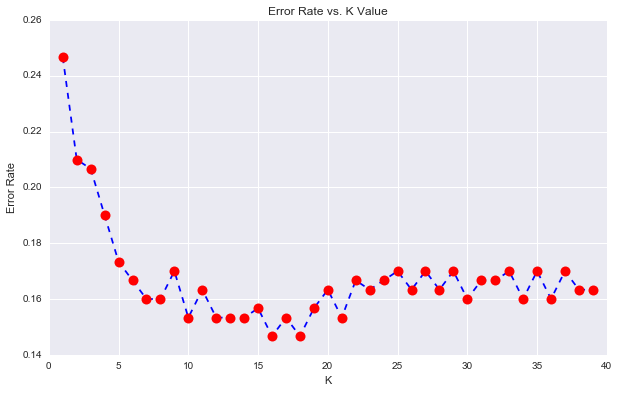

## Retrain with new K Value

- Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.

In [83]:
# Create KNN Object
classifier1 = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

# Train model
classifier1.fit(X_train, y_train)
classifier1

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [84]:
y_pred1 = classifier.predict(X_test)
y_test, y_pred1

(521    0
 737    0
 740    1
 660    0
 411    0
       ..
 408    0
 332    0
 208    0
 613    0
 78     1
 Name: TARGET CLASS, Length: 200, dtype: int64,
 array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 1], dtype=int64))

In [85]:
confusion_matrix(y_test, y_pred1)

array([[ 99,   1],
       [  0, 100]], dtype=int64)

In [87]:
print('k = 10')
print(classification_report(y_test,y_pred1))

k = 10
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.99      1.00      1.00       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



# Great Job!